In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv("nhlstats.csv")
data1 = data.drop(columns=["Unnamed: 0"])
print("Shape of the data is: {}".format(data.shape))
data.head()

Shape of the data is: (7857, 26)


,Unnamed: 0,Season,Age,Team_ID,Pos,GP,G,A,PTS,PIM,...,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,S_Pct
0,0,2015,27,DET,LW,71.0,23,21,44,72.0,...,15.0,6.0,0.0,154.0,1272.0,28.0,153.0,7.0,8.0,14.935065
1,1,2015,27,EDM,C,3.0,0,0,0,5.0,...,0.0,0.0,0.0,2.0,32.0,3.0,3.0,4.0,4.0,0.000000
2,2,2015,24,CBJ,C,3.0,0,0,0,4.0,...,0.0,0.0,0.0,0.0,19.0,0.0,2.0,0.0,0.0,NaN
3,3,2015,37,PIT,RW,70.0,1,6,7,44.0,...,5.0,0.0,1.0,51.0,682.0,29.0,183.0,17.0,23.0,1.960784
4,4,2015,24,COL,LW,1.0,0,1,1,0.0,...,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,2.0,0.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7857 non-null   int64  
 1   Season      7857 non-null   int64  
 2   Age         7857 non-null   int64  
 3   Team_ID     7857 non-null   object 
 4   Pos         7857 non-null   object 
 5   GP          7857 non-null   float64
 6   G           7857 non-null   int64  
 7   A           7857 non-null   int64  
 8   PTS         7857 non-null   int64  
 9   PIM         7857 non-null   float64
 10  PS          7857 non-null   float64
 11  PlusMinus   7857 non-null   float64
 12  esG         7857 non-null   float64
 13  ppG         7857 non-null   float64
 14  shG         7857 non-null   float64
 15  GWG         7857 non-null   float64
 16  esA         7857 non-null   float64
 17  ppA         7857 non-null   float64
 18  shA         7857 non-null   float64
 19  S           7857 non-null  

In [38]:
data.describe()

,Unnamed: 0,Season,Age,GP,G,A,PTS,PIM,PS,PlusMinus,...,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,S_Pct
count,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,...,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7857.000000,7649.000000
mean,4214.647066,2018.553901,26.314369,43.492427,6.932926,11.682449,18.615375,20.847779,2.213160,-0.382971,...,8.782996,2.698867,0.200585,74.478045,718.023291,33.941199,54.640193,71.212677,71.211404,7.761629
std,2430.619031,2.312947,4.254647,28.180575,8.547963,12.836047,20.196198,21.822803,2.670268,9.703081,...,8.748502,4.845678,0.533248,67.631960,550.165514,37.211817,52.239388,166.142407,155.699438,7.796731
min,0.000000,2015.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,-47.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2113.000000,2017.000000,23.000000,15.000000,1.000000,2.000000,3.000000,4.000000,0.100000,-5.000000,...,1.000000,0.000000,0.000000,16.000000,188.000000,7.000000,14.000000,0.000000,0.000000,2.500000
50%,4215.000000,2019.000000,26.000000,48.000000,4.000000,7.000000,12.000000,15.000000,1.200000,-1.000000,...,6.000000,0.000000,0.000000,59.000000,673.000000,22.000000,40.000000,1.000000,2.000000,7.000000
75%,6323.000000,2021.000000,29.000000,70.000000,10.000000,18.000000,29.000000,30.000000,3.600000,3.000000,...,14.000000,3.000000,0.000000,116.000000,1174.000000,45.000000,80.000000,30.000000,37.000000,11.382114
max,8418.000000,2022.000000,45.000000,82.000000,60.000000,87.000000,128.000000,238.000000,15.300000,64.000000,...,56.000000,34.000000,6.000000,398.000000,2378.000000,283.000000,382.000000,1273.000000,935.000000,100.000000


In [39]:
data.isna().sum()

Unnamed: 0      0
Season          0
Age             0
Team_ID         0
Pos             0
GP              0
G               0
A               0
PTS             0
PIM             0
PS              0
PlusMinus       0
esG             0
ppG             0
shG             0
GWG             0
esA             0
ppA             0
shA             0
S               0
TOI             0
BLK             0
HIT             0
FOW             0
FOL             0
S_Pct         208
dtype: int64

In [40]:
X = data.drop(columns=["Unnamed: 0","PTS","G","A",'esG', 'ppG', 'shG',
       'GWG', 'esA', 'ppA', 'shA',])
y = data["PTS"]

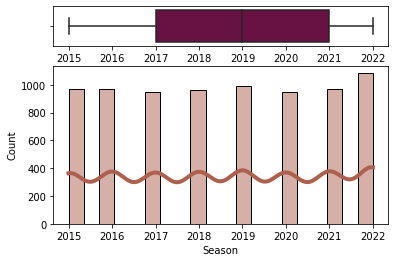

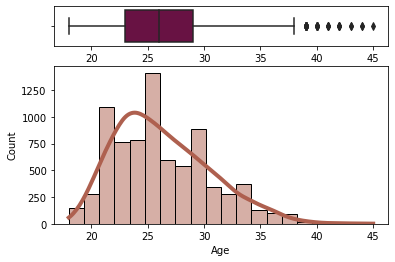

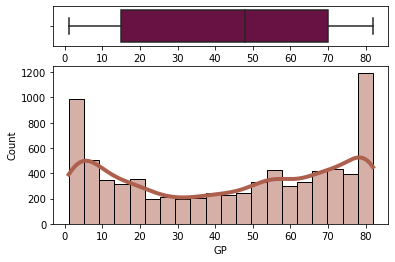

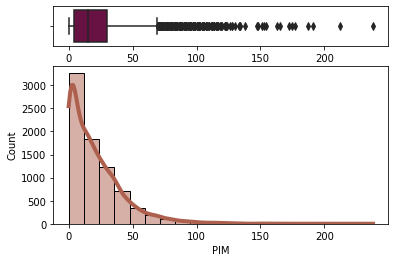

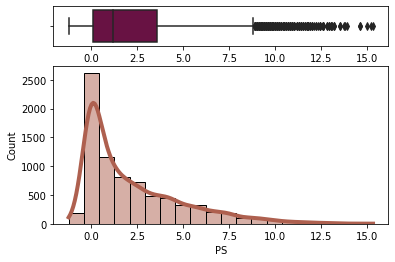

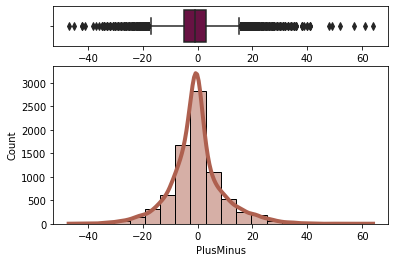

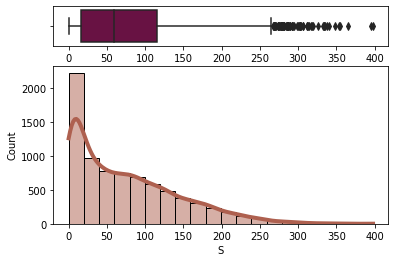

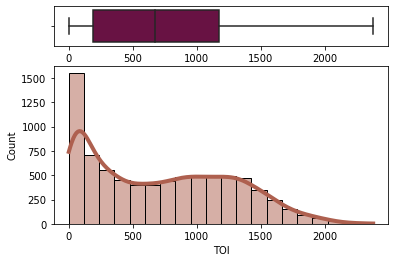

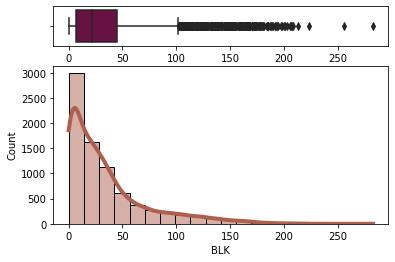

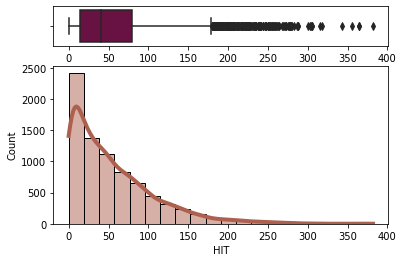

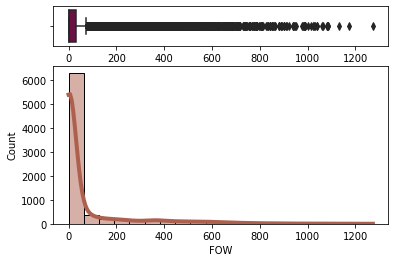

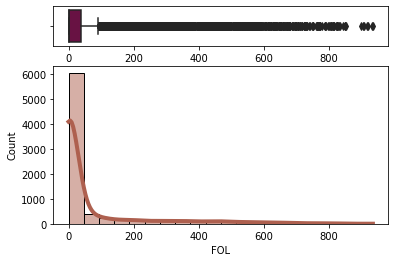

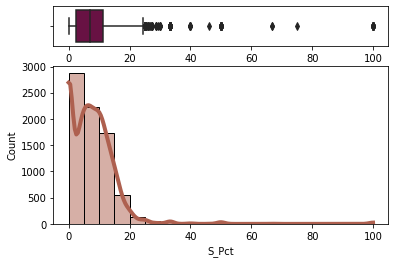

In [41]:
for i in X.select_dtypes(include="number").columns:
    fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=i,data=X, color="#760445", ax=ax1)
    sns.histplot(x=i,data=X, kde=True, color="#AE604F", line_kws={"lw":4}, bins=20, ax=ax2)
    plt.show()

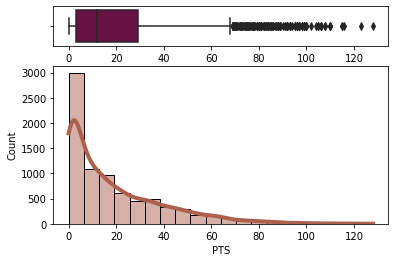

In [42]:
fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
sns.boxplot(x="PTS",data=y.to_frame(), color="#760445", ax=ax1)
sns.histplot(x="PTS",data=y.to_frame(), kde=True, color="#AE604F", line_kws={"lw":4}, bins=20, ax=ax2)
plt.show()

# -----------------------------------------------

In [43]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [44]:
numerical_features = X.select_dtypes(include="number").columns
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])
categorical_features = X.select_dtypes(include=["object","category"]).columns
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[
    ("num",numerical_transformer,numerical_features),
    ("cat",categorical_transformer, categorical_features)])
# reg = Pipeline(steps=[
#     ("preprocessor",preprocessor),
#     ("regressor",GradientBoostingRegressor())
# ])
# reg.fit(xTrain,yTrain)

results_table = pd.DataFrame(columns=["model","acc_train","acc_test","mae","mse","rmse"])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

def results(model):
    global seenData, unseenData, predictedData, dataMerged, x, results_table
    x = Pipeline(steps=[
    ("preprocessor", preprocessor),
    # ("RFE", RFE(LinearRegression())),
    ("regressor", model)])
    x.fit(xTrain,yTrain)
    print("TESTING DATASET RESULTS\n")
    print("R2 is: {}".format(r2_score(yTest,x.predict(xTest))))
    print("Mean absolute error is: {}".format(mean_absolute_error(yTest,x.predict(xTest))))
    print("Mean squared error is: {}".format(mean_squared_error(yTest,x.predict(xTest))))
    print("Root mean squared error is: {}".format(sqrt(mean_squared_error(yTest,x.predict(xTest)))))
    results_table.loc[len(results_table)] = [len(results_table)+1,x.score(xTrain,yTrain),x.score(xTest,yTest),mean_absolute_error(yTest,x.predict(xTest)),mean_squared_error(yTest,x.predict(xTest)),sqrt(mean_squared_error(yTest,x.predict(xTest)))]
    seenData = pd.DataFrame({"Actual":yTrain,"Predicted":x.predict(xTrain),"Status":"Seen"})
    unseenData = pd.DataFrame({"Actual":yTest,"Predicted":x.predict(xTest),"Status":"Unseen"})
    predictedData = pd.concat([seenData,unseenData])
    dataMerged = pd.merge(left=data1,right=predictedData,left_index=True,right_index=True,how="inner")

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
models = {1:"LinearRegression",2:"RandomForestRegressor",3:"DecisionTreeRegressor",4:"GradientBoostingRegressor",5:"XGBRegressor"}

In [47]:
results(GradientBoostingRegressor())

TESTING DATASET RESULTS

R2 is: 0.9771900592204018
Mean absolute error is: 2.100126462095444
Mean squared error is: 9.378603534995957
Root mean squared error is: 3.062450576743396


In [48]:
x

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Season', 'Age', 'GP', 'PIM', 'PS', 'PlusMinus', 'S', 'TOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'S_Pct'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Team_ID', 'Pos'], dtype='object'))])),
                ('regressor', GradientBoostingRegressor())])

In [49]:
results(RandomForestRegressor())

TESTING DATASET RESULTS

R2 is: 0.9768716223860119
Mean absolute error is: 1.9642391857506363
Mean squared error is: 9.509532977099239
Root mean squared error is: 3.083753066816349


In [50]:
results(DecisionTreeRegressor())

TESTING DATASET RESULTS

R2 is: 0.9491741468749264
Mean absolute error is: 2.882442748091603
Mean squared error is: 20.897709923664124
Root mean squared error is: 4.571401308533755


In [51]:
results(LinearRegression())

TESTING DATASET RESULTS

R2 is: 0.9643849079454822
Mean absolute error is: 2.7369490756819905
Mean squared error is: 14.643607866814932
Root mean squared error is: 3.826696730447153


In [52]:
results_table["model"].replace(models,inplace=True)
results_table.style.highlight_max(subset=["acc_test"],color="#874C62").highlight_min(subset=["mae","mse","rmse"],color="#874C62")

,model,acc_train,acc_test,mae,mse,rmse
0,LinearRegression,0.982869,0.977190,2.100126,9.378604,3.062451
1,RandomForestRegressor,0.996712,0.976872,1.964239,9.509533,3.083753
2,DecisionTreeRegressor,1.000000,0.949174,2.882443,20.897710,4.571401
3,GradientBoostingRegressor,0.964861,0.964385,2.736949,14.643608,3.826697


In [53]:
# Best results - Random Forest Regressor
results(RandomForestRegressor())

TESTING DATASET RESULTS

R2 is: 0.976535404367189
Mean absolute error is: 1.9843715012722647
Mean squared error is: 9.64777338422392
Root mean squared error is: 3.106086506236412


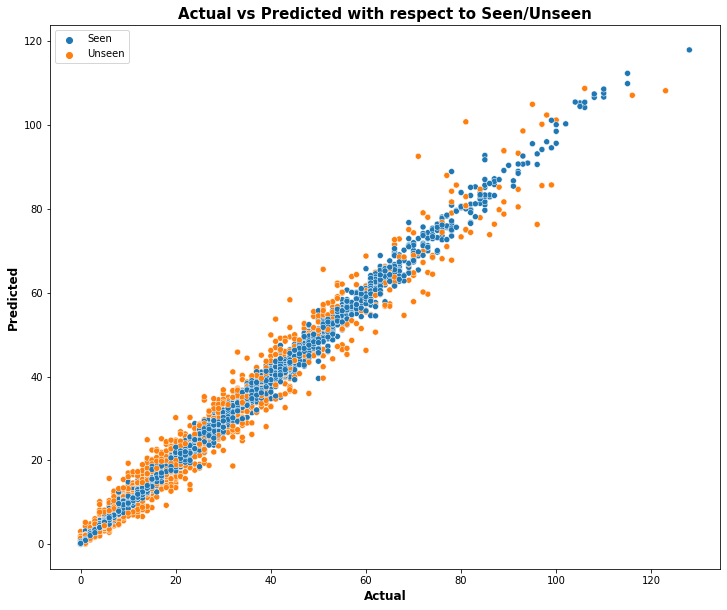

In [54]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Actual",y="Predicted",data=dataMerged,hue="Status")
plt.title("Actual vs Predicted with respect to Seen/Unseen", fontsize=15, fontweight="bold")
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.legend()
plt.show()

In [55]:
dataMerged.head()

,Season,Age,Team_ID,Pos,GP,G,A,PTS,PIM,PS,...,S,TOI,BLK,HIT,FOW,FOL,S_Pct,Actual,Predicted,Status
0,2015,27,DET,LW,71.0,23,21,44,72.0,5.6,...,154.0,1272.0,28.0,153.0,7.0,8.0,14.935065,44,44.70,Seen
1,2015,27,EDM,C,3.0,0,0,0,5.0,-0.1,...,2.0,32.0,3.0,3.0,4.0,4.0,0.000000,0,0.02,Seen
2,2015,24,CBJ,C,3.0,0,0,0,4.0,0.0,...,0.0,19.0,0.0,2.0,0.0,0.0,NaN,0,0.00,Seen
3,2015,37,PIT,RW,70.0,1,6,7,44.0,-0.3,...,51.0,682.0,29.0,183.0,17.0,23.0,1.960784,7,6.75,Seen
4,2015,24,COL,LW,1.0,0,1,1,0.0,0.1,...,1.0,10.0,0.0,1.0,0.0,2.0,0.000000,1,1.00,Seen
